# Plotting in Python:  Panel plots, embedded axes

---

### What does this cover?
1.  Panel plots (all equal sizes)
2.  Panel plots (different sizes)
3.  Embedding plots within others

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

---

# (1) Panel plots (all same size)

## Two ways to make a panel plot (e.g., 2x2)

Best practice is to use the "advanced" fig/ax creation, since you can specify columns and rows.

![Oops, figure not available](png-files/grid_example_equal_size.png)

---

#### (1) Make the `fig` instance, then use `ax# = fig.add_subplot(rows, columns, plot)`

Notice how each set of axes is created individually using the (#,#,#) numbering syntax (starts at 1)

    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(222) # commas not required
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ...
    ax1.plot()
    ax2.contour()
    ax3.scatter()
    ...

---

#### (2) Use `fig, ax_array = fig.subplots(rows, columns)`

This syntax creates `fig` and ALL axes at once, but in this case it places the axes into an array, `ax_array`:

    fig, ax_array = plt.subplots(2,2) # (rows, columns)
    ...
    ax_array[0,0].plot()
    ax_array[0,1].plot()
    ...
    
In this case:  
* `ax1` is the same as `ax_array[0,0]`
* `ax2` is the same as `ax_array[0,1]`
* `ax3` is the same as `ax_array[1,0]`
* `ax4` is the same as `ax_array[1,1]`

In [2]:
# set up a few arrays to plot
a = np.array((1,2,3,4,5))
b = np.array((6,7,5,9,13))
c = np.random.rand(10,10) # 10x10 array with random numbers between 0 and 1

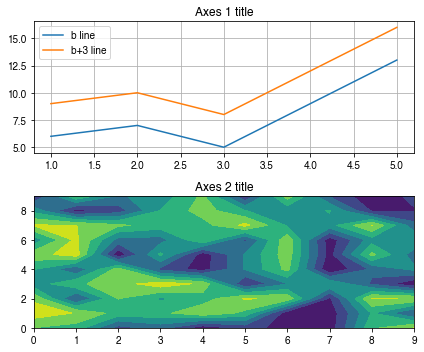

In [3]:
fig = plt.figure(figsize=(6,5))

ax1 = fig.add_subplot(2,1,1) # (nrows, ncols, current axes starting at 1)
ax2 = fig.add_subplot(212) # commas not necessary if numbers are single digits

ax1.plot(a, b, label='b line') # add labels to lines to create legend
ax1.plot(a, b+3, label='b+3 line')
ax1.legend()

ax2.contourf(c)

ax1.grid()
ax1.set_title('Axes 1 title')
ax2.set_title('Axes 2 title')

fig.tight_layout()

Text(0.5,1,'Axes 2 title')

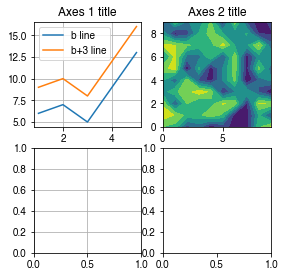

In [4]:
fig, ax_array = plt.subplots(2,2)
fig.set_size_inches(4.25, 4.25)

# ===== set each ax_array entry equal to its own axis ===== #
ax1 = ax_array[0,0]
ax2 = ax_array[0,1]
ax3 = ax_array[1,0]
ax4 = ax_array[1,1]
# ===== above 4 lines same as below ===== 
#ax1,ax2,ax3,ax4 = ax_array.flatten()

ax1.plot(a, b, label='b line')
ax1.plot(a, b+3, label='b+3 line')
ax1.legend()

ax2.contourf(c)

ax1.grid()
ax3.grid()

ax1.set_title('Axes 1 title')
ax2.set_title('Axes 2 title')

# ===== use tight_layout() to pad plots automatically
#fig.tight_layout()

You can also turn the axis off and put a legend in its place

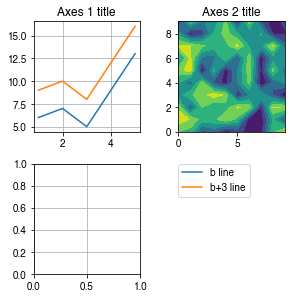

In [5]:
fig, ax_array = plt.subplots(2,2)
fig.set_size_inches(4.25, 4.25)

ax1,ax2,ax3,ax4 = ax_array.flatten()
ax4.axis('off') # turn off axis outline but keep axis itself

ax1.plot(a, b, label='b line')
ax1.plot(a, b+3, label='b+3 line')

ax2.contourf(c)

ax1.grid()
ax3.grid()

ax1.set_title('Axes 1 title')
ax2.set_title('Axes 2 title')

handles, labels = ax1.get_legend_handles_labels()
ax4.legend(handles, labels, \
           bbox_to_anchor=(0,1), loc='upper left', \
           #fancybox=False, \
           #edgecolor='None', \
           borderaxespad=0)

# ===== use tight_layout() to pad plots automatically
fig.tight_layout()

---

# (2) Panel plots (different sizes)

To create a panel plot where the individual plots are different sizes, use `GridSpec`.  [Click here for GridSpec documentation](https://matplotlib.org/users/gridspec.html).

In [6]:
import matplotlib.gridspec

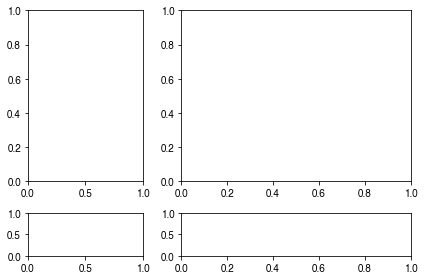

In [7]:
# ===== gridspec will automatically attach itself to the most recently created fig
fig = plt.figure()

gs = matplotlib.gridspec.GridSpec(2, 2,
                                  width_ratios=[1, 2],
                                  height_ratios=[4, 1])
# ===== gs is a list of axes
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

fig.tight_layout()

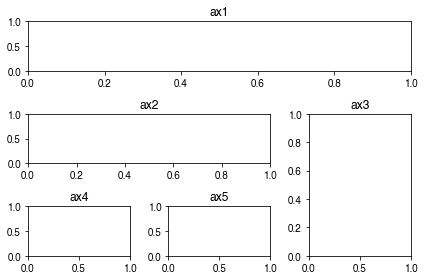

In [8]:
fig = plt.figure()

gs = matplotlib.gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0, 0:3])
ax2 = plt.subplot(gs[1, 0:2])
ax3 = plt.subplot(gs[1:3, 2])
ax4 = plt.subplot(gs[2, 0])
ax5 = plt.subplot(gs[2, 1])

ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')
ax4.set_title('ax4')
ax5.set_title('ax5')

fig.tight_layout()

---

# (3) Adding/embedding axes

To create a figure-within-a-figure or attach a whole new axes object:
1. Create the primary axes object first
2. Get the position of it using `ax.get_position()`
3. Position the **new** axis using these relative positions

*No need to use any sort of `subplot(s)` syntax here*

---

### To get the position of the primary axes, use `ax_pos = ax.get_position()`
The output of this has several important attributes, which you'll need to correctly place the NEW axes:

![Oops, figure not available](png-files/ax_pos_example.png)

Bbox(x0=0.047263071895424835, y0=0.07722222222222219, x1=0.9766339869281044, y1=0.9283333333333332)


Text(0.5,1,'Axes 2 title')

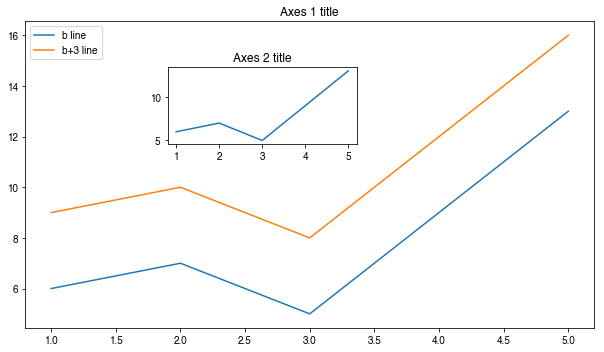

In [9]:
# ================================================================================
#1:  create figure/primary axes
# ================================================================================
fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(111)

ax1.plot(a, b, label='b line') # add labels to lines to create legend
ax1.plot(a, b+3, label='b+3 line')
ax1.legend()
ax1.set_title('Axes 1 title')

fig.tight_layout()

# ================================================================================
#2:  get position of this axes object
# ================================================================================
ax1_pos = ax1.get_position()
print(ax1_pos)

# ================================================================================
#3:  create and position the new axis
#
# fig.add_axes([ lower left x-coord, lower left y-coord, width, height])
# --> all relative to original figure (0 to 1)
# ================================================================================
lower_left_x = ax1_pos.x0 + 0.25*ax1_pos.width # start axes 25% over (x) from corner
lower_left_y = ax1_pos.y0 + 0.6*ax1_pos.height # start axes 60% up (y) from corner

ax2_width = 0.333*ax1_pos.width # make axes 33.3% of the width
ax2_height = 0.25*ax1_pos.height # make axes 33.3% of the height

ax2 = fig.add_axes([lower_left_x, lower_left_y, ax2_width, ax2_height])
ax2.plot(a,b)
ax2.set_title('Axes 2 title')

Secondary axes can be outside the figure too  
Lets you make a "manual" panel plot

Bbox(x0=0.047263071895424835, y0=0.07722222222222219, x1=0.9766339869281044, y1=0.9283333333333332)


Text(0.5,1,'Axes 2 title')

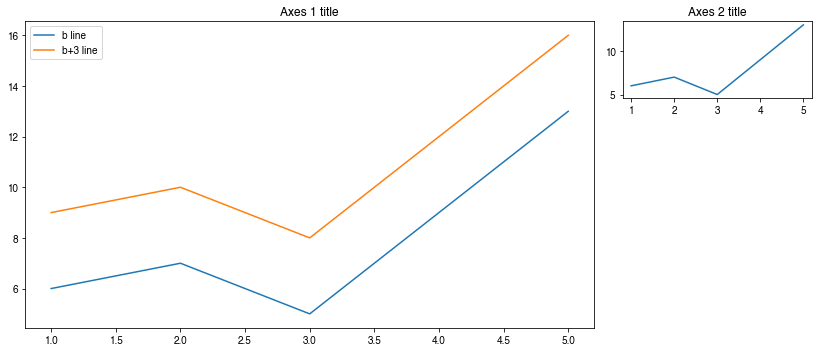

In [10]:
# ================================================================================
#1:  create figure/primary axes
# ================================================================================
fig = plt.figure(figsize=(8.5,5))

ax1 = fig.add_subplot(111)

ax1.plot(a, b, label='b line') # add labels to lines to create legend
ax1.plot(a, b+3, label='b+3 line')
ax1.legend()
ax1.set_title('Axes 1 title')

fig.tight_layout()

# ================================================================================
#2:  get position of this axes object
# ================================================================================
ax1_pos = ax1.get_position()
print(ax1_pos)

# ================================================================================
#3:  create and position the new axis
#
# fig.add_axes([ lower left x-coord, lower left y-coord, width, height])
# --> all relative to original figure (0 to 1)
# ================================================================================
lower_left_x = ax1_pos.x1 + 0.05*ax1_pos.width
lower_left_y = ax1_pos.y1 - 0.25*ax1_pos.height

ax2_width = 0.333*ax1_pos.width # make axes 33.3% of the width
ax2_height = 0.25*ax1_pos.height # make axes 35% of the height

ax2 = fig.add_axes([lower_left_x, lower_left_y, ax2_width, ax2_height])
ax2.plot(a,b)
ax2.set_title('Axes 2 title')